

## Getting started

Either:

- Click [this link](https://colab.research.google.com/github/engmaths/SEMT10002_2024/blob/main/weekly_labs/Week_14_numpy/Numpy,%20Scipy.ipynb) to open this notebook in Google colab.  You'll need to sign in with a Google account before you can run it.  When you do, hit `Ctrl+F9` to check it all runs.

or

- Download it to your local computer using `git clone https://github.com/engmaths/SEMT10002_2024` or just use `git pull` to refresh if you've done this already.
- Navigate to the subfolder `weekly_labs/Week_14_numpy` and open the notebook `Numpy, Scipy.ipynb`.  For example, in Visual Studio Code, use `Ctrl+K Ctrl+O` to open a folder and select the folder just mentioned.  Then you can open the notebook file by clicking on it in the left hand explorer sidebar.

<h1> Introduction to Numpy and Scipy</h1>

*NumPy* (**Num**erical **Py**thon) is a Python library extensively used for Scientific Computing. Although not part of the core Python library, NumPy is a fundamental part of the modern *Scientific Computing* technology stack and NumPy is used "under the hood" in many other libraries (e.g. in SciPy, SKLearn, or Pandas). Code that is written using NumPy is generally faster, more readable, and more likely to be correct!

Today's lab will give you a brief introduction to the key features of NumPy. We won't cover everything, so it's a good idea to be aware of the official documentation <a href=https://numpy.org/doc/1.19/>here</a>

The key things introduced by NumPy are:

1. A multidimensional *array* data type. This is a bit like a list, with the restriction that all data in the array must be of the same *type*. This means we can't mix, for example, ints and strings or ints and floats within an array. For paying this price, we get much more efficient (both in terms of memory and CPU time) code.
2. Many common mathematical or scientific utility functions- e.g. calculating the dot product of two vectors.

<h2> Getting Started</h2>

<h3> Installing and importing NumPy</h3>

Depending on how you installed Python, you may already have NumPy installed. You can check this by trying to import it. By convention, numpy as imported as *np*. Try running the line below- if you don't get an error, you already have NumPy installed.


In [1]:
import numpy as np

If you don't have it installed, you can install it with pip (Python installation package). Do this by typing

```bash
pip3 install numpy
```

<h2> NumPy Arrays</h2>

The key thing that NumPy provides for us is an *array* data type. An array is a bit like a list- it can contain multiple elements. Unlike lists, we can't mix data types within an array-we have to specify a single data type that is shared by all elements in the array. The other major difference between an array and a list is that arrays are *multidimensional*. Lists, on the other hand, can only be 1-dimensional. We can make something that looks 2D, 3D or higher by using nesting, but this quickly gets messy. Arrays on the other hand can natively be specified as 2, 3 or N dimensional. This makes them a natural choice for storing and processing vectors and matrices. By forcing all elements in the array to have the same data type, NumPy arrays allow code that runs quicker, makes better use of memory and is easier to read and write. 

<h3> Creating Arrays</h3>

We have a number of options when it comes to defining an array:

1. We can make an array from a list

In [2]:
my_list = [1, 2, 3]
my_array = np.array(my_list)
print(my_array)

[1 2 3]


we can make 2 or 3D arrays from lists by nesting them.

In [3]:
my_nested_list = [[1, 2, 3], [4, 5, 6]]
my_2D_array = np.array(my_nested_list)
print(my_2D_array)

[[1 2 3]
 [4 5 6]]


We can turn an array back into a list using the built-in tolist() method.

In [90]:
matrix_as_list = my_2D_array.tolist()
print(matrix_as_list)

[[1, 2, 3], [4, 5, 6]]


2. We can make an array with np.zeros or np.ones. np.ones will make an array of all ones, while np.zeros will make an array of all zeros. Here, we must specify the dimensions of the array (and optionally the data type).

In [91]:
matrix1 = np.ones((2, 3))
print("Matrix 1")
print(matrix1)
print(matrix1.dtype)

print("\n")

matrix2 = np.ones((3, 4, 5), dtype=np.uint8)
print("Matrix 2")
print(matrix2)
print(matrix2.dtype)

Matrix 1
[[1. 1. 1.]
 [1. 1. 1.]]
float64


Matrix 2
[[[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]

 [[1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]
  [1 1 1 1 1]]]
uint8


Here, *matrix1* is a 2x3 matrix of floats (NumPy will infer a data type if you don't specify one). *matrix2* is a 3x4x5 array of *unsigned* 8 bit integers (i.e. representing number from 0 to (2^8)-1=255.

<h3> Array Properties</h3>

We've already seen one property of an array- *dtype* is used to represent the type of data it stores. 
Arrays have many other attributes that can you access (using the standard dot notation)- you can find a full list <a href=https://numpy.org/doc/1.21/reference/arrays.ndarray.html#id1>here</a>. Of these, the ones I find myself using the most are:

- shape - this provides a tuple of the array dimensions.
- size - this provides the number of elements in the array.

In general, we can change the *shape* of an array, as long as the *size* does not change. We can also transpose an array (similar to matrix transposition), using the .transpose() method.

In [92]:
array1 = np.array([[1, 2, 3], [4, 5, 6]])
print("Shape:", array1.shape)
print("Size:", array1.size)

array2 = array1.reshape(1, 6)
print(array2)
print("Shape:", array2.shape)
print("Size:", array2.size)

print(array2.transpose())

Shape: (2, 3)
Size: 6
[[1 2 3 4 5 6]]
Shape: (1, 6)
Size: 6
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


<h3> Accessing Array Elements </h3>

Accessing an element of a NumPy array is in many ways similar to a list. For a 1D array, we are square brackets ([]) to specify the index we want to access. e.g. 

In [93]:
vector = np.array([0, 1, 2])
print(vector[1])

1


Just like a list, we can use reverse and slice notation too. 

In [94]:
print("Indexing with -1 will return the last element")
print(vector[-1])
print("\nIndexing with two numbers seperated by a colon will return a slice")
print(vector[1:3])

Indexing with -1 will return the last element
2

Indexing with two numbers seperated by a colon will return a slice
[1 2]



<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/array_axes.png?raw=true" width="20%">


However, the syntax changes when we move from a 1D array to a 2D array. To access a single element of a 2D array, we need to specify two values-the index of the column and the index of the row. Both indices are specified within a single set of square brackets and separated by a comma (,). e.g. To get the top right element of a 2x2 matrix, we would access element [0, 0], while to access the bottom left element we would access element [1, 1]. e.g.

In [95]:
matrix = np.array([[1, 2], [3, 4]])
print("Full matrix")
print(matrix)
print("Accessing top right")
print(matrix[0, 0])
print("Accessing bottom left")
print(matrix[1, 1])


Full matrix
[[1 2]
 [3 4]]
Accessing top right
1
Accessing bottom left
4


If we want to access an entire row or column of an array, we can use a ':' to specify that we want all of a particular axis.

In [96]:
print("Top Row")
print(matrix[0, :])
print("Bottom")
print(matrix[1, :])
print("Left column")
print(matrix[:, 0])
print("Right column")
print(matrix[:, 1])

Top Row
[1 2]
Bottom
[3 4]
Left column
[1 3]
Right column
[2 4]


<h3> Exercise 1 - Making and Reshaping Arrays</h3>

1. Create an array to represent the following 3x3 matrix

$ \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 6 \\
4 & 8 & 12 
\end{bmatrix}  $

2. Turn the 3x3 matrix into a 1x9 matrix.
3. Create a new 1x6 matrix by removing the first two and last elements of the 1x9 matrix.
4. Turn this 1x6 matrix into a 3x2 matrix.
5. The determinant of a 2x2 matrix

$ \begin{bmatrix}
a & b  \\
c & d  \\ 
\end{bmatrix}  $

is given by the formula $determinant = ad-bc$. Write some code to find the determinant of the matrix:

$ \begin{bmatrix}
7 & 9  \\
4 & 6  \\ 
\end{bmatrix}  $

In [14]:
#Your code goes here.

array = [[1,2,3],[2,4,6],[4,8,12]]

matrix1 = np.array(array)
print(matrix1)

matrix1_reshaped = matrix1.reshape((1,9))
print(matrix1_reshaped)

matrix1_sliced = matrix1_reshaped[0, 2:-1]
print(matrix1_sliced)

matrix1_reshaped2 = matrix1_sliced.reshape((3, 2))
print(matrix1_reshaped2)

[[ 1  2  3]
 [ 2  4  6]
 [ 4  8 12]]
[[ 1  2  3  2  4  6  4  8 12]]
[3 2 4 6 4 8]
[[3 2]
 [4 6]
 [4 8]]


In [18]:
def determinant(array):
    return array[0, 0] * array[1,1] - array[0, 1] * array[1, 0]

two_by_two_matrix = np.array([[1,2],[3,4]])

print(determinant(two_by_two_matrix))

-2
2


<h2> Array Operations and Vectorisation</h2>

Much of the power of NumPy comes from its ability to efficiently apply operations to every element in an array. For example, if we wanted to double every element in a list, we might write the following code:


In [19]:
initial_list = [1, 2, 3, 4, 5, 6]
doubled_list = []

for element in initial_list:
    doubled_list.append(2 * element)

print(doubled_list)

[2, 4, 6, 8, 10, 12]


We can achieve the same thing using more compact syntax with a list comprehension

In [98]:
initial_list = [1, 2, 3, 4, 5, 6]
doubled_list = [element*2 for element in initial_list]
print(doubled_list)

[2, 4, 6, 8, 10, 12]


Using a NumPy array, we can avoid the loop altogether and just write:

In [99]:
initial_array = np.array([1, 2, 3, 4, 5, 6])
doubled_array = 2 * initial_array
print(doubled_array)

[ 2  4  6  8 10 12]


It's important to understand here that NumPy isn't just simplifying the syntax for us- by using memory and CPU caches more efficiently, the final piece of code will also run faster too. Now the speed-up for this exercise here may be marginal, but as code gets more complex, the difference will be meaningful.

<h3> Mathematical Operations</h3>

Numpy will vectorise many mathematical operators for us- additional, multiplication, and so on will automatically be applied element wise.

In [100]:
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])

print("Addition")
print(vector1 + vector2)
print("Subtraction")
print(vector1 - vector2)
print("Multiplication")
print(vector1 * vector2)
print("Squaring")
print(vector1**2)
print(vector2**2)

Addition
[5 7 9]
Subtraction
[-3 -3 -3]
Multiplication
[ 4 10 18]
Squaring
[1 4 9]
[16 25 36]


Note that these operations will only work if the corresponding mathematical operations are well-defined- if we try to add arrays of different lengths, for example, we would get an error.

In [101]:
vector1 = np.array([1, 2])
vector2 = np.array([4, 5, 6])
print(vector1+vector2)

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

<h3> Logical Operations</h3>

Just like mathematical operations, logical operations (such as <, >, ==) are also vectorised. If we write the expression ```array < value```, then we'll get a new array consisting only of True and False values. e.g.

In [102]:
vector1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(vector1 < 5)

[ True  True  True  True False False False False False False]


We can then use this boolean array to index into our original array-this will give us a new array containing only the values that satisfy our condition.

In [21]:
vector1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
boolean_array = vector1 < 5
print(vector1[boolean_array])

[1 2 3 4]


We can write this more compactly as:

In [22]:
print(vector1[vector1 < 5])

[1 2 3 4]


<h3> Built-in functions</h3>

Finally, NumPy has many built-in functions that we can use. All NumPy functions are vectorised, so can be applied to whole arrays without using a loop. We won't go through all of these, but you can find a list <a href=https://numpy.org/doc/stable/reference/routines.math.html>here</a>

In [23]:
print(np.sin(vector1))

array_A = np.array([1,2,3,4,5,6])
array_B = np.array([1,2,3,4,5,6])

convolution_AB = np.convolve(array_A, array_B)

print(convolution_AB)

[ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111]
[ 1  4 10 20 35 56 70 76 73 60 36]


<h3> Exercise 2</h3>

1. Calculating mean squared error.

In machine learning, it's common to work with models that make predict the value of things- for example, we could train a model to predict the number of medals that team GB is expected to win at the Olympics, or the number of admissions to hospital on a certain day of the year. One way of evaluating such a model is to calculate the mean squared error-this is given by the formula:

$ MSE = \frac{1}{n} \sum_{i=1}^n(Y_{predicted, i} - Y_{actual, i})^2$

where $n$ is the number of predictions, $Y_{predicted, i} is the ith prediction and Y_{actual, i} is the ith actual value. Given the following data set, write some code to calculate the mean squared error. 


In [28]:
predictions = np.array([4, 5, 6, 1, 2, 6, 8, 9, 10])
actual = np.array([5, 5, 6, 2, 3, 5, 4, 7, 9])

#Your code goes here.

n = predictions.size

mse = sum((predictions - actual)**2) / n

print(mse)

2.7777777777777777


2. The function np.roots (look up the details in the NumPy documentation) can be used to find the roots of polynomial equations. Use np.roots to find the roots of the following Polynomials:

- $ x^2 - 2x + 1 $
- A 1000 degree polynomial with random integers co-efficients


In [33]:
# Your code goes here.

coefficients1 = [1,-2,1]

print(np.roots(coefficients1))

coefficients2 = np.random.rand(1000)
print(coefficients2)

print(np.roots(coefficients2))

[1. 1.]
[0.70271461 0.68151879 0.84739591 0.89761371 0.4068551  0.42983171
 0.19585832 0.1000674  0.36980869 0.93369107 0.9270821  0.13130433
 0.22821611 0.79072856 0.87149706 0.92372104 0.26013252 0.67811512
 0.39807785 0.46921537 0.53944488 0.94897219 0.50930228 0.98987384
 0.03138981 0.01560607 0.19290254 0.57376195 0.13025887 0.38622763
 0.67637064 0.34936848 0.38405945 0.68459007 0.1772515  0.7776033
 0.11101938 0.54254898 0.86444352 0.02274013 0.62645796 0.45177556
 0.69859299 0.73043917 0.94201765 0.92981993 0.88174751 0.09153499
 0.79718848 0.26165618 0.84266185 0.3321316  0.0672883  0.59831776
 0.62756032 0.7328618  0.30010171 0.12500151 0.28264248 0.9332974
 0.48874827 0.86198983 0.80686813 0.49780774 0.99843582 0.342837
 0.8096715  0.61043653 0.07587249 0.3263205  0.37524944 0.90851911
 0.43598235 0.86670967 0.56504072 0.66012225 0.95944891 0.95948634
 0.0106516  0.46589765 0.45965477 0.05844066 0.93285952 0.20994547
 0.21691267 0.55608435 0.92022507 0.14551075 0.18001663 0.

<h2> Solvings ODEs with Scipy</h2>

Ordinary differential equations (ODEs) can be used to model a huge range of physical systems-from predicting the trajectory of a rocket, to understanding the factors that affect population growth. The general approach used is to first write down a set of equations,  describing how quantities in the system change. For example, we might represent the population on the planet earth with a variable N. If over some duration of time (say 1 month), we expect some fraction of people to die (say $\alpha$), then we can write the equation:

$$dN/dt = -\alpha N$$

We can then predict how the population will change over time (for a particular death rate) by solving the equation. If we wanted to improve the model, by say, considering births as well, then we can introduce a second term to represent this-for example, we could assume that some proportion of the population ($\beta$) gives birth. This would lead to a new equation:

$$dN/dt = -\alpha N + \beta N$$

In your other courses, you have seen a number of techniques for solving ODEs. Here, we will look at how we can use Python to numerically integrate an equation like this. We won't go too much into the details of how this happens-you'll see a lot more on this in later courses. Our focus is on being able to write the code we need to solve ODE models.

<h3> Numerical integration with Scipy </h3>

To perform numerical integration with Python, we'll need to use a library which contains the necessary functionality- in this case, we'll use Scipy's odeint functionality. If you don't have this installed, you will need to install it (for example, by running in a terminal ```pip3 install scipy```).

To integrate an ODE with Scipy, we'll use the <a href=https://docs.scipy.org/doc/scipy-1.15.0/reference/generated/scipy.integrate.odeint.html>odeint</a> function.

Let's take a quick look at the documentation for this function:

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/odeint1.png?raw=true" width="60%">


Here, we can see that odeint is a function with 3 required arguments (func, y0, t) and 19(!!) optional arguments. We can also see that ths function will *Integrate a system of ordinary differential equations* by solving the initial value problem for  systems of first order ode-s:

$dy/dt = func(y, t, args) $ 

where y can be a vector. Fortunately, all of the optional arguments have default values, so we can assume (for now) that these are reasonable and just focus on understanding the three things that we need to provide. Scrolling down the documentation page, we get further information on what we need to provide for the function to work:

<img src="https://github.com/engmaths/SEMT10002_2024/blob/main/img/odeint2.png?raw=true" width="60%">

This tells us that the first argument (*func*) needs to be a callable (i.e. a function) that calculates the derivative of y at time t. The second argument y0 is an array that defines the initial condition and  the third argument t0 is an array that defines the time points for which to solve y for. It also tells us that the odeint function will return an array y (with shape len(t), len(y0). This array will contain the value of y for each desired time in t, with the initial value y0 in the first row.

The code below shows how we can use odeint to integrate our model of population growth.

T is :

[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959184
  51.02040816  53.06122449  55.10204082  57.14285714  59.18367347
  61.2244898   63.26530612  65.30612245  67.34693878  69.3877551
  71.42857143  73.46938776  75.51020408  77.55102041  79.59183673
  81.63265306  83.67346939  85.71428571  87.75510204  89.79591837
  91.83673469  93.87755102  95.91836735  97.95918367 100.        ]
T is :

[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959

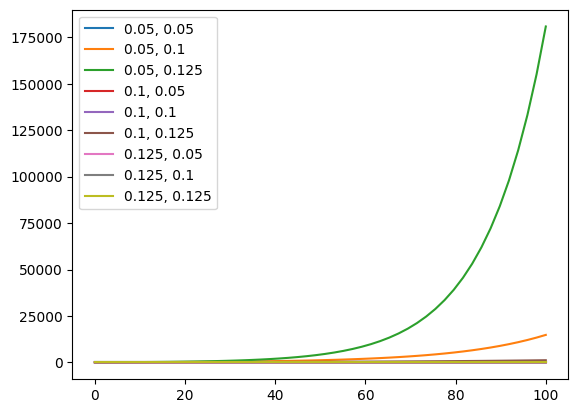

In [44]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

#This function defines the right hand side of the equation we want to integrate
def gradient(N, t, alpha, beta):
	return -alpha*N + beta*N 

#Lets start with an initial population of 100 people
N0 = 100
#We also need some values for our parameters

for a in [0.05, 0.1, 0.125]:
	for b in [0.05, 0.1, 0.125]:
		#We need to tell scipy which timesteps to use for the integration- linspace will give us evenly spaced points
		t = np.linspace(0, 100)
		print("T is :\n")
		print(t)
		N = odeint(gradient, N0, t, (a, b))
		plt.plot(t, N, label=f"{a}, {b}")

plt.legend()
plt.show()

This code begins by importing some libraries that we will need. We then define a function for calculating the gradient of our system. This function must always have two arguments- the first represents the current state of the system (and can be a number, or a numpy array), the second represents the current timestep. The gradient may also have some optional parameters- here we use this to pass the values of $\alpha$ and $\beta$. 

We then create some variables to represent our initial population (N0) and paramaters ($\alpha$ and $\beta$). We create a sequence of time points for the integration with the line ```t = np.linspace(0, 100)```. Then we perform the integration with odeint- here we must provide the gradient function as the first argument, the initial condition as the second argument and then any paramaters as a tuple. Finally, we plot the result. 

Here, as the death rate ($\alpha$ = 0.1) is bigger than the death rate ($\beta = 0.05$), the population dies out.

**Exercise**: Modify the code above to repeat the integration with 3 different values of $\alpha$ and 3 different values of $\beta$ (i.e 9 times in total). Plot the results on a single figure, with 9 axes. Label each axes with the values of $\alpha$ and $\beta$. Hint: If you can't remember how to do this, review the matplotlib worksheet.


<h3> Understanding epidemics with the SIR model </h3>

A simple model for understanding the spread (or not) of a disease through the population is the (S)usceptible, (I)nfected, (R)emoved model. Here, the population is divided into three categories- those who have not yet had the disease are susceptible. Those who have it are infected, and those who have recovered (or died) are removed. The equations describing the model are as follows, with N the size of the population:

$$dS/dT = (-\beta * S * I) / N$$
$$dI/dT = (\beta * S * I) / N - \gamma * I$$
$$dR/dT = \gamma * I$$


Essentially, this assumes that some fraction of the susceptible people will interact with the infected, catching the disease proportional to the parameter $\beta$. These people become infected, and so are subtracted from the count of susceptible people. As these are now infected, we need to also add the same amount of the number of infected. At the same time, some proportion of the infected people ($\gamma$) recover. We need to subtract this number from I, and add it to R. 

We can solve this system in Python with the following code:

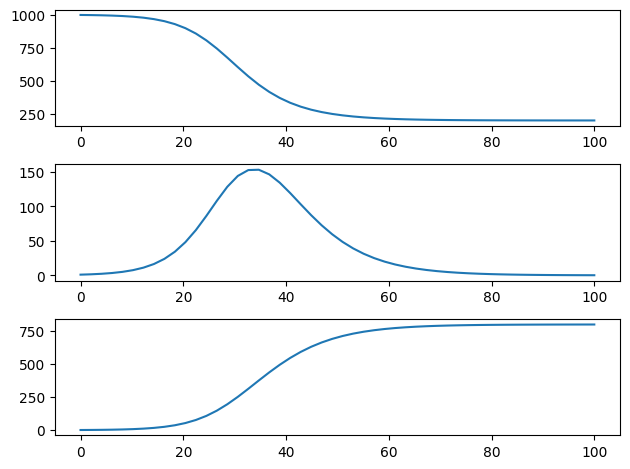

In [45]:
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import numpy as np 

#Let's use a population of 1000 people
N = 1000 
#S represents the number of susceptible people; we'll start our model with one infected, with means S=N-1
S = N-1 
#I represents the number of infected people; we'll leave start this at one.
I = 1 
#R represents the number of people removed (either due to recovery or death). We start this at zero.
R = 0 

def diff_sir(sir, t, beta, gamma):

	'''
	Calculates the gradient for an SIR model of disease spread
	Inputs:
		sir: state of the system, with sir[0] = number susceptible
									   sir[1] = number infected
									   sir[2] = number recovered
		t: current time- not used here, but odeint expects to pass this argument so we must include it
		beta: the rate at which the virus spreads
		gamma: the rate at which people are removed due to the virus
	Outputs:
		the gradient of the SIR model
	'''

	dsdt = (-beta*sir[0] * sir[1])/N 
	didt = (beta*sir[0]*sir[1])/N - (gamma * sir[1])
	drdt = gamma * sir[1]

	grad = [dsdt, didt, drdt]

	return grad 

def solve_sir(sir0, t_max, beta, gamma):
	'''
	Solves an SIR model using odeint.
	'''

	t = np.linspace(0, t_max)
	sir = odeint(diff_sir, sir0, t, (beta, gamma))

	return sir, t 

def plot_sir(t, data):

	fig = plt.figure()
	ax1 = fig.add_subplot(311)
	ax1.plot(t, data[:, 0], label='S(t)')
	ax2 = fig.add_subplot(312)
	ax2.plot(t, data[:, 1], label='I(t)')
	ax3 = fig.add_subplot(313)
	ax3.plot(t, data[:, 2], label='R(t)')
	plt.tight_layout()

def main():

	#Set values for model parameters here.
	beta = 0.4
	gamma = 0.2 
	#Let's solve for 100 time steps
	t_max = 100 
	#Create a tuple to represent the initial conditions
	sir0 = (S, I, R)
	#Solve the model
	sir, t = solve_sir(sir0, t_max, beta, gamma)
	#Plot the results
	plot_sir(t, sir)

main()

**Task 3**:A variation on the SIR  model is the SIS model, in which those who recover from the disease can become re-infected again. The equations for describing this system are:

$$dS/dT = (-\beta * S * I) / N + \gamma * I$$
$$dI/dT = (\beta * S * I) / N - \gamma * I$$

Extend the code above to also solve this system. You'll need to define a new function for calculating the gradient (i.e "diff_SIS") and another function to solving the ODE (i.e "solve_SIS"). Plot the results of both models on a single figure.

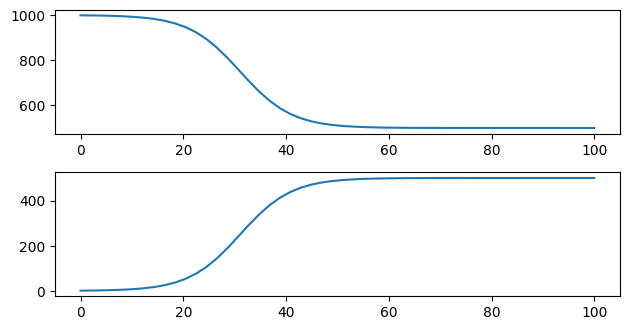

In [50]:
import matplotlib.pyplot as plt 
from scipy.integrate import odeint 
import numpy as np 

#Let's use a population of 1000 people
N = 1000 
#S represents the number of susceptible people; we'll start our model with one infected, with means S=N-1
S = N-1 
#I represents the number of infected people; we'll leave start this at one.
I = 1 

def diff_sis(sis, t, beta, gamma):

	'''
	Calculates the gradient for an SIR model of disease spread
	Inputs:
		sir: state of the system, with sir[0] = number susceptible
									   sir[1] = number infected
									   sir[2] = number recovered
		t: current time- not used here, but odeint expects to pass this argument so we must include it
		beta: the rate at which the virus spreads
		gamma: the rate at which people are removed due to the virus
	Outputs:
		the gradient of the SIR model
	'''

	dsdt = (-beta*sis[0] * sis[1])/N + gamma * sis[1]
	didt = (beta*sis[0]*sis[1])/N - (gamma * sis[1])

	grad = [dsdt, didt]

	return grad 

def solve_sis(sis0, t_max, beta, gamma):
	'''
	Solves an SIR model using odeint.
	'''

	t = np.linspace(0, t_max)
	sir = odeint(diff_sis, sis0, t, (beta, gamma))

	return sir, t 

def plot_sis(t, data):

	fig = plt.figure()
	ax1 = fig.add_subplot(311)
	ax1.plot(t, data[:, 0], label='S(t)')
	ax2 = fig.add_subplot(312)
	ax2.plot(t, data[:, 1], label='I(t)')
	plt.tight_layout()

def main():

	#Set values for model parameters here.
	beta = 0.4
	gamma = 0.2 
	#Let's solve for 100 time steps
	t_max = 100 
	#Create a tuple to represent the initial conditions
	sis0 = (S, I)
	#Solve the model
	sir, t = solve_sis(sis0, t_max, beta, gamma)
	#Plot the results
	plot_sis(t, sir)

main()

<h3> Lotka-Volterra model</h3>

The Lotka-Volterra equations can be used to describe the population of a predator-prey system. If we use x to represent the population density of the prey animal, and y to represent the population density of the predator, then the equations describing the model are:

$$dx/dt = \alpha x - \beta xy$$
$$dy/dt = \delta xy - \gamma y$$

where $\alpha$ describes the birth rate of the prety, $\beta$ the effect of the predator on the preys growth rate, $\delta$ the predator's death rate, and $\gamma$ the effect of the prey on the predators growth rate. 

<h3> Exercise 4</h3>

Write a program to solve the Lotka-Volterra system. When run from the terminal, your code should use sensible default values to solve the equation, producing a plot to show the output.

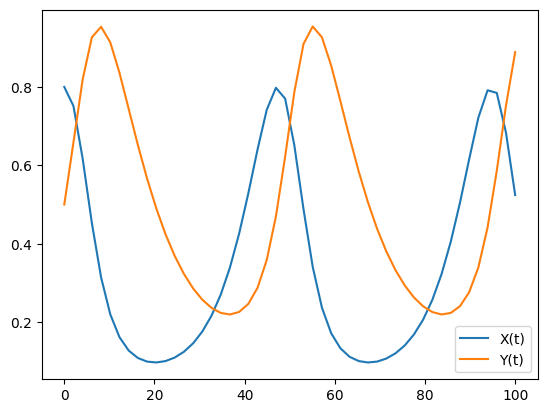

In [58]:
#X represents the population density of the prey animal
X = 0.8
#Y represents the population density of the predator animal
Y = 0.5

def diff_xy(xy, t, alpha, beta, gamma, delta):
     
    dxdt = alpha * xy[0] - beta * xy[0] * xy[1]
    dydt = delta * xy[0] * xy[1] - gamma * xy[1]

    grad = [dxdt, dydt]

    return grad

def solve_xy(xy0, t_max, alpha, beta, gamma, delta):
    '''
    Solves a Lotka-Volterra model using odeint.
    '''

    t = np.linspace(0, t_max)
    xy = odeint(diff_xy, xy0, t, (alpha, beta, gamma, delta))

    return xy, t

def plot_xy(t, data):
    
    fig = plt.figure()
    ax1 = fig.add_subplot(411)
    ax1.plot(t, data[:, 0], label='X(t)')
    ax2 = fig.add_subplot(412)
    ax2.plot(t, data[:, 1], label='Y(t)')
    plt.tight_layout()

def plot_xy_one(t, data):
     
    plt.plot(t, np.array(data), label=['X(t)', 'Y(t)'])
    plt.legend()

def main():

    #Set values for model parameters here.
	alpha = 0.2
	beta = 0.4
	gamma = 0.1
	delta = 0.3
	#Let's solve for 100 time steps
	t_max = 100 
	#Create a tuple to represent the initial conditions
	xy0 = (X, Y)
	#Solve the model
	xy, t = solve_xy(xy0, t_max, alpha, beta, gamma, delta)
	#Plot the results
	plot_xy_one(t, xy)
     
main()